Predict the total_cases label for each (city, year, weekofyear) in the test set. There are two cities, San Juan and Iquitos, with test data for each city spanning 5 and 3 years respectively. The data for each city have been concatenated along with a city column indicating the source: sj for San Juan and iq for Iquitos. The test set is a pure future hold-out, meaning the test data are sequential and non-overlapping with any of the training data. Throughout, missing values have been filled as NaNs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dengue_features_train.csv")
df.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4


In [3]:
df.columns # list all the columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

In [4]:
df.shape

(1456, 24)

rename columns which have 'station' such that 'station' is abbreviated to 'stn' and rest of column name remains intact.

similarly rename columns which have 'reanalysis' to abbreviate 're_an', retaining rest of column name same

rename columns which have 'humidity' to abbreviate to 'hd', retaining rest of column name same

abbreviate 'precipitation' part of column name to 'prec', retaining rest of column name same

In [5]:
## abbreviate station to stn 
df.columns = df.columns.str.replace("station", "stn")
## 'reanalysis' as 're_an'
df.columns = df.columns.str.replace("reanalysis", "re_an")
##'humidity' as 'hd'
df.columns = df.columns.str.replace("humidity","hd")
##'precipitation' as 'prec'
df.columns = df.columns.str.replace("precipitation","prec")
# check if the columns have been renamed
df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'prec_amt_mm', 're_an_air_temp_k',
       're_an_avg_temp_k', 're_an_dew_point_temp_k', 're_an_max_air_temp_k',
       're_an_min_air_temp_k', 're_an_precip_amt_kg_per_m2',
       're_an_relative_hd_percent', 're_an_sat_precip_amt_mm',
       're_an_specific_hd_g_per_kg', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_max_temp_c', 'stn_min_temp_c',
       'stn_precip_mm'],
      dtype='object')

In [6]:
# check the type of the columns and renamed columns
df.dtypes

city                           object
year                            int64
weekofyear                      int64
week_start_date                object
ndvi_ne                       float64
ndvi_nw                       float64
ndvi_se                       float64
ndvi_sw                       float64
prec_amt_mm                   float64
re_an_air_temp_k              float64
re_an_avg_temp_k              float64
re_an_dew_point_temp_k        float64
re_an_max_air_temp_k          float64
re_an_min_air_temp_k          float64
re_an_precip_amt_kg_per_m2    float64
re_an_relative_hd_percent     float64
re_an_sat_precip_amt_mm       float64
re_an_specific_hd_g_per_kg    float64
re_an_tdtr_k                  float64
stn_avg_temp_c                float64
stn_diur_temp_rng_c           float64
stn_max_temp_c                float64
stn_min_temp_c                float64
stn_precip_mm                 float64
dtype: object

Change the column 'year', 'city' as categorical variables and check if the column data type is changed and the levels of category are correct.

In [7]:
df.city = df.city.astype('category')
df.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [8]:
#change year variable type as category
df.year = df.year.astype('category')
df.year.value_counts()

2001    104
2003    104
2002    104
2007    104
2006    104
2005    104
2004    104
2000     78
2008     69
1991     52
2009     52
1999     52
1998     52
1997     52
1996     52
1995     52
1994     52
1993     52
1992     52
1990     35
2010     26
Name: year, dtype: int64

In [9]:
df.year.dtype, df.city.dtype

(CategoricalDtype(categories=[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
                   2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
                   2010],
                  ordered=False),
 CategoricalDtype(categories=['iq', 'sj'], ordered=False))

The predictor column (y-value) is present in the file 'dengue_labels_train.csv'. Merging it with the above dataframe using city, year and weekofyear as join conditions. 

In [10]:
# Load data for predictor column
df_pred = pd.read_csv("dengue_labels_train.csv")
df_pred.shape

(1456, 4)

The dataset dengue_labels_train.csv has 1456 rows with 4 columns

In [11]:
# random check on dataset 'dengue_labels_train.csv'
df_pred.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [12]:
df_pred.columns

Index(['city', 'year', 'weekofyear', 'total_cases'], dtype='object')

In [13]:
#Merge datasets dengue_features_train.csv and dengue_labels_train.csv
data = pd.merge(df, df_pred,on = ["city","year","weekofyear"])
data.columns # new column 'total_cases' is added

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'prec_amt_mm', 're_an_air_temp_k',
       're_an_avg_temp_k', 're_an_dew_point_temp_k', 're_an_max_air_temp_k',
       're_an_min_air_temp_k', 're_an_precip_amt_kg_per_m2',
       're_an_relative_hd_percent', 're_an_sat_precip_amt_mm',
       're_an_specific_hd_g_per_kg', 're_an_tdtr_k', 'stn_avg_temp_c',
       'stn_diur_temp_rng_c', 'stn_max_temp_c', 'stn_min_temp_c',
       'stn_precip_mm', 'total_cases'],
      dtype='object')

In [14]:
data.head(3)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.12260,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.16990,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.03225,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4


Count NANs in merged dataframe and use forward fill method to fill NANs (df_merged.fillna(method='ffill'))

In [15]:
data.isna().sum()

city                            0
year                            0
weekofyear                      0
week_start_date                 0
ndvi_ne                       194
ndvi_nw                        52
ndvi_se                        22
ndvi_sw                        22
prec_amt_mm                    13
re_an_air_temp_k               10
re_an_avg_temp_k               10
re_an_dew_point_temp_k         10
re_an_max_air_temp_k           10
re_an_min_air_temp_k           10
re_an_precip_amt_kg_per_m2     10
re_an_relative_hd_percent      10
re_an_sat_precip_amt_mm        13
re_an_specific_hd_g_per_kg     10
re_an_tdtr_k                   10
stn_avg_temp_c                 43
stn_diur_temp_rng_c            43
stn_max_temp_c                 20
stn_min_temp_c                 14
stn_precip_mm                  22
total_cases                     0
dtype: int64

In [16]:
data.isna().sum().sum()

548

In [17]:
data = (data.fillna(method='ffill'))

In [18]:
data.to_csv('merged_data.csv', index = False)

In [19]:
#Merged dataset 'data'
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [20]:
print(df.shape)
print(df_pred.shape)
print(data.shape)

(1456, 24)
(1456, 4)
(1456, 25)


The datasets dengue_features_train and dengue_labels_train have 1456 rows. Above is the number of columns and rows in both the dataframes. When these dataframes are merged we have a dataframe "data" with 1456 rows and 25 columns.

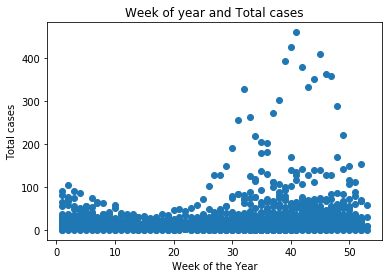

In [21]:
plt.scatter(x ='weekofyear',y='total_cases', data= data)
plt.xlabel("Week of the Year")
plt.ylabel("Total cases")
plt.title("Week of year and Total cases")
plt.show()

The number of cases increased with the weeks of the year but in case of weeks around 15 there was slight reduction in the number of cases.

In [22]:
sample_means = []
# check for all the available samples in the data
for _ in range(data.shape[0]): 
    df_sample = data['total_cases'].sample(n=400)
    mean = np.mean(df_sample)
    sample_means.append(mean)# storing in List

Box plot to observe the density of data and if it complies to Central Limit Theorem (for large enough data, mean of sample is mean of population, or data is tightly packed close to the mean)

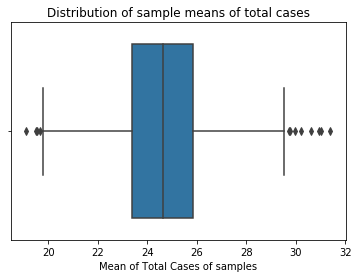

Mean of the total number of cases of all the sample means 24.67261675824176
Mean of the total number of cases of entire dataset 24.67513736263736


In [23]:
sns.boxplot(sample_means)
plt.title("Distribution of sample means of total cases")
plt.xlabel("Mean of Total Cases of samples")
plt.show()
print("Mean of the total number of cases of all the sample means",np.mean(sample_means))
print("Mean of the total number of cases of entire dataset", data.total_cases.mean())

Here the mean of the samples and mean of total cases of the entire dataset is very close.

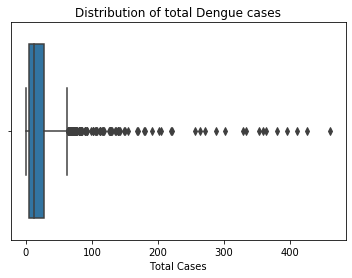

In [24]:
ax = sns.boxplot(x=data["total_cases"])
plt.title("Distribution of total Dengue cases")
plt.xlabel("Total Cases")
plt.show()

The distribution of total cases is skewed to left. The mean here is in the 3rd quartile and data is distributed around the mean though there are few outliers. Also, data is tightly packed around the mean.So we can say that data compiles to central limit theorm.

(array([1266.,  132.,   26.,   12.,    5.,    3.,    2.,    5.,    3.,
           2.]),
 array([  0. ,  46.1,  92.2, 138.3, 184.4, 230.5, 276.6, 322.7, 368.8,
        414.9, 461. ]),
 <a list of 10 Patch objects>)

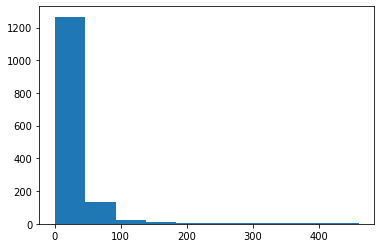

In [25]:
plt.hist(data["total_cases"])

d). Find the mean, min, max and standard deviation of total_cases by city

In [26]:
#mean by total cases city
print("Mean of total cases:", data.groupby('city')['total_cases'].mean())
#Min by total cases city
print("Minimum of total cases:", data.groupby('city')['total_cases'].min())
#Max by total cases city
print("Maximum of total cases:", data.groupby('city')['total_cases'].max())
#SD by total cases city
print("Standard Deviation of total cases:", data.groupby('city')['total_cases'].std())

Mean of total cases: city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64
Minimum of total cases: city
iq    0
sj    0
Name: total_cases, dtype: int64
Maximum of total cases: city
iq    116
sj    461
Name: total_cases, dtype: int64
Standard Deviation of total cases: city
iq    10.765478
sj    51.381372
Name: total_cases, dtype: float64


Find the variation between mean and standard deviation of total_cases by city

https://www-users.york.ac.uk/~mb55/msc/applbio/week3/sd_text.pdf

In [27]:
x = data[(data['city'] == 'iq')]
y = data[(data['city'] == 'sj')]

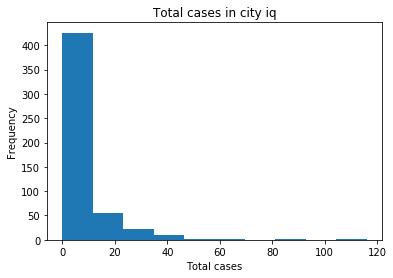

In [28]:
plt.hist(x['total_cases'])
plt.xlabel("Total cases")
plt.ylabel("Frequency")
plt.title("Total cases in city iq")
plt.show()

In [29]:
print("Mean of the city IQ",x.total_cases.mean())
print("Standard Deviation of city IQ",x.total_cases.std())

Mean of the city IQ 7.565384615384615
Standard Deviation of city IQ 10.765478342208679


In [30]:
print(x.total_cases.mean()+x.total_cases.std())
print(x.total_cases.mean()-x.total_cases.std())
print(x.total_cases.mean()+2*(x.total_cases.std()))
print(x.total_cases.mean()-2*(x.total_cases.std()))

18.330862957593293
-3.200093726824064
29.096341299801974
-13.965572069032742


For the city IQ the total number of cases are mostly within two standard deviations of the mean. There are very few entries beyond the mean + 2 standard deviations.95% of the observations lie within the two standard deviations of the mean.

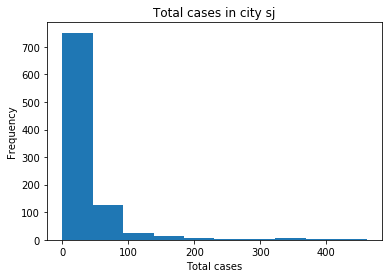

In [31]:
plt.hist(y['total_cases'])
plt.xlabel("Total cases")
plt.ylabel("Frequency")
plt.title("Total cases in city sj")
plt.show()

In [32]:
print("Mean of the city SJ",y.total_cases.mean())
print("Standard Deviation of city SJ",y.total_cases.std())

Mean of the city SJ 34.18055555555556
Standard Deviation of city SJ 51.38137249715158


In [33]:
print(y.total_cases.mean()+y.total_cases.std())
print(y.total_cases.mean()-y.total_cases.std())
print(y.total_cases.mean()+2*(y.total_cases.std()))
print(y.total_cases.mean()-2*(y.total_cases.std()))

85.56192805270715
-17.200816941596024
136.94330054985872
-68.5821894387476


For the city SJ the total number of cases are mostly within two standard deviations of the mean. There are very few entries beyond the mean + 2 standard deviations.95% of the observations lie within the two standard deviations of the mean.

In [34]:
df_iq = data[(data['city'] == 'iq') & (data['total_cases']>=50)]

In [35]:
print("Number of years in city iq with cases greater than or equal to 50 are",df_iq.year.count())

Number of years in city iq with cases greater than or equal to 50 are 5


In [36]:
print("Years with cases greater than or equal to 50 are",df_iq.year.unique())

Years with cases greater than or equal to 50 are [2004 2008]


In [37]:
df_temp=data.groupby(['weekofyear'])[["total_cases"]].sum()
df_temp.shape

(53, 1)

In [38]:
df_temp.columns

Index(['total_cases'], dtype='object')

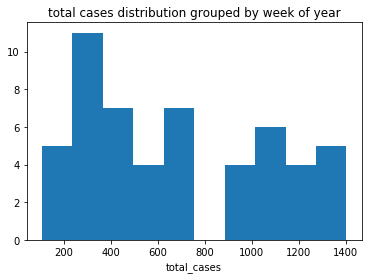

In [39]:
plt.hist(df_temp.total_cases)
plt.xlabel('total_cases')
plt.title('total cases distribution grouped by week of year')
plt.show()